In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [2]:
path = os.path.join(os.getcwd(), '..', 'DevanagariHandwrittenCharacterDataset')

train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')

In [3]:
def generate_data(path):
    labels = ''
    images = []
    for folder in tqdm(os.listdir(path)):
        label = folder.split('_')[-1]
        image_paths = os.listdir(os.path.join(path, folder))
        data = list(map( lambda image: plt.imread(os.path.join(path, folder, image)).reshape(1024), image_paths))
        images.extend(data)
        labels += (label + ',') * len(image_paths)
    labels = labels.split(',')
    return np.array(images), np.array(labels[:-1])

In [4]:
images, labels = generate_data(train_path)

In [5]:
images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Converting Numpy array to Pandas Dataframe
df = pd.DataFrame(images)

In [25]:
## We need to normalize the dataframe.
df = df - df.mean()

df = df / df.max()
df.fillna(0, inplace = True)

Extracting the unique classes

In [8]:
unique_classes = np.unique(labels)

print (unique_classes)
unique_classes.shape

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'adna' 'ba' 'bha' 'cha' 'chha'
 'chhya' 'da' 'daa' 'dha' 'dhaa' 'ga' 'gha' 'gya' 'ha' 'ja' 'jha' 'ka'
 'kha' 'kna' 'la' 'ma' 'motosaw' 'na' 'pa' 'patalosaw' 'petchiryakha'
 'pha' 'ra' 'taamatar' 'tabala' 'tha' 'thaa' 'tra' 'waw' 'yaw' 'yna']


(46,)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df[4].unique()

array([0.])

In [11]:
np.array(df.iloc[0]).reshape(32,32)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

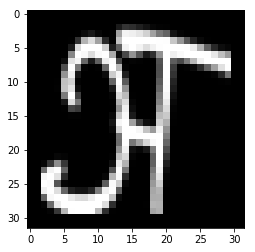

In [12]:
plt.imshow(np.array(df.iloc[0]).reshape(32,32), cmap = plt.get_cmap('gray'))

Covariance is a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. We use the following formula to compute covariance.

Covariance matrix is a symmatric and squared matrix. 

We need the covariance matrix to be 
- Non-Singular
- Positive Definite

Non-Singularity of a matrix is some of the matrix vectors are linearly dependent.<br>
We can check the non-singularity of the matrix 
- Calculating the determinant of the covariance matrix ( If determinant is zero that means matrix is singular). 



In [13]:
## Calculating the determinant
cov = df.cov()
det = np.linalg.det(cov)
print ('Determinant of Covariance Matrix: %.1f'%det)

Determinant of Covariance Matrix: 0.0


Determinant of Covariance matrix is 0. That means that matrix is Singular. 

So, now we have to choose the columns which are linearly independent. For that we can use 

**Principle Component Analysis**<br>
PCA is a dimensionality reduction algorithm, which we use to when we have too many dimensions. So, it will be computationally complex to make calculation for 1million feature. So, we have to take only those feature vector which having very high variance. And leave others.


PCA is using Singular Value Decomposition to extract features with 

In [26]:
def PCA(data, labels):
    
    ## We are taking the data columns. 
    global unique_classes
    
    cov_mat = list(map(lambda y: data[y == labels].cov(), unique_classes))

    svd_mat = list(map(lambda x: np.linalg.svd(x), cov_mat))
    
    ## Taking column number 
    col_no = np.array(list(map(lambda x: np.argmax(x[0], axis = 1), svd_mat)))
    
    
    col_val = list(map(lambda x: set(col_no[:, x]), np.arange(col_no.shape[1])))

    cols = []
    
    for i in col_val:
        if (len(i) == 1):
            cols.extend(i)
        
    return cols

In [27]:
column_names = PCA(df, labels)

In [84]:
data = PCA(0.95).fit_transform(df)

In [85]:
data.shape

(78200, 174)

Here, I got the data columns for every class labels. Now, i have to find all the 

In [28]:
data = df[column_names]

Here, i am spliting my normalized and filtered data into training data and testing data. 

In [29]:
def train_test_split(x, y, test_split = 0.5, rand_state = 10):
    np.random.seed(rand_state)
    mask = np.random.rand(x.shape[0]) < test_split
    x_test = x[mask]
    y_test = y[mask]
    x_train = x[~mask]
    y_train = y[~mask]
    return x_train, x_test, y_train, y_test

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_split = 0.3)

We have to are nt able to find the Solution for the dataset using PCA (Principle Component Analysis). So now, we have to find the columns using RDA (Regularized Discriminant Analysis).

RDA is a decision boundary technique which creates a non-linear decision boundary using a hybrid approach of linear and non-linear decision boundary. 

In the following approach we have are adding the LDA and QDA. 

$$\Sigma_{RDA} = \Gamma \Sigma_{p} + (1 - \Gamma) \Sigma_{pooled}$$

To find Pooled Covariance Matrix.

$$\Sigma_{pool} =  \frac{\Sigma_{i = 1}^{K} n_i\Sigma_i}{N - K} $$
Where $n$ is the number rows of each classes<br>
$N$ is the total number of rows in dataset.<br>
$K$ is number of classes

In [32]:
def RDA(data, labels):
    
    global unique_classes
    
    cov_mat_estimate = list(map(lambda x:data[labels == x].cov() , unique_classes))
    mat = []
    mat.extend(map(lambda x, y: np.count_nonzero(labels == y) * x, cov_mat_estimate, unique_classes))
    
    first_param = 0.1  
    
    pooled_matrix = (1 - first_param) * sum(mat) / (labels.shape[0] - np.unique(labels).shape[0])

    cov_pool_matrix = list(map(lambda x: (x * first_param) + ((1 - first_param) * pooled_matrix), cov_mat_estimate))

    second_param = 0.13
    
    sigma = list(map( lambda x: np.trace(x) / x.shape[0], cov_pool_matrix))
    cov_rda_mat = list(map(lambda x, y: ((1 - second_param) * x) + (second_param * y * np.eye(x.shape[0])),cov_pool_matrix, sigma))
    
    return cov_rda_mat

In [33]:
cov = RDA(x_train, y_train)

In [34]:
np.linalg.det(cov[2])

9.33439675814733e-69

In [35]:
def estimate_class_mean(x_train, y_train):
    
    global unique_classes
    ##we have to perform random sampling for every class. 
    ## Calculate the mean on the samples 
    ## Find the mean for the value. 

    est_sample_mean = list(map( lambda y: x_train[y == y_train].mean(), unique_classes))
    return est_sample_mean

In [36]:
mu_value = estimate_class_mean(x_train, y_train)

Writing code for joint gaussian probability distribution. 

Formula 

\begin{equation}
P(X_0 = x_0 \cap X_1 = x_1 \cap ... \cap X_N = x_n | y = अ) = \frac{P(Y = अ | X_0 = x_0 \cap X_1 = x_1 \cap ... \cap X_N = x_n)P(अ)}{Total Porbability} \end{equation}<br>
So, we are assuming all the feature are gaussianly distributed. 
Then we can use <b>Gaussian Probabilty Distribution Function</b> to calculate the probability for every character. 

$$P(X_0 = x_0 \cap X_1 = x_1 \cap ... \cap X_N = x_n | y = अ) = P(X_0 = x_0 | y = अ)\thinspace \cap P(X_0 = x_0 | y = अ) \thinspace\cap... \cap\thinspace P(X_N = x_N | y = अ) $$

Every image have total 1024 pixels. So we have to create the probability distribution function for 1024 values. Which is computationally expensive. 
So, we can use a different type of distribution where instead of dealing with one pixel per pdf. We can input all the pixels at once and make computation on all parameters at once. 
This type of probability distribution function is known as **Joint Probability Distribution Function**. 

So, Joint PDF for Gaussian Distribution is:


$$P(X_0 = x_0 \cap X_1 = x_1\cap...\cap X_N = x_n) = \frac{1}{\sqrt{({2 \pi})^n} {\sqrt{\det({\Sigma})}}} e ^ {-\frac{1}{2}{\begin{bmatrix} x_0 - \mu_{x_0} \\ . \\ .\\ x_N - \mu_{x_n}\end{bmatrix}}^T \thinspace\Sigma^{-1} \begin{bmatrix} x_0 - \mu_{x_0} \\ . \\ .\\ x_N - \mu_{x_n}\end{bmatrix}  } $$


In [51]:
def Gauss_joint_pdf(x, mu, cov):
    
    det = np.linalg.det(cov)
#     print ('Shape:', x.shape[1])
#     print ('Determinant:' ,det)
    first =  1/ np.sqrt( ((2 * np.pi) ** x.shape[1]) * det)
#     print ('First: ', first)
    zero_mean = x - mu
#     print ('mean Value:', zero_mean)
    inv = np.linalg.inv(cov)
#     print('Inverse', inv)
    val = inv @ zero_mean.T
#     print ('Value', val)
    second = - 0.5 * (np.dot(zero_mean, val))
    print (np.exp(second))
    return first * np.exp(second)

In [52]:
for i in range(46):
    print (f'Iteration: {i}')
    print (Gauss_joint_pdf(x_train.iloc[0:2], mu_value[i], cov[i]))

Iteration: 0
[[3.33951631e-13 2.65047160e-03]
 [2.65047160e-03 6.57279774e-19]]
[[7.55685854e-04 5.99764669e+06]
 [5.99764669e+06 1.48733224e-09]]
Iteration: 1
[[1.39998220e-14 9.14263793e-05]
 [9.14263793e-05 1.58914147e-20]]
[[7.67264829e-05 5.01065267e+05]
 [5.01065267e+05 8.70934191e-11]]
Iteration: 2
[[1.24515782e-12 6.17238528e-03]
 [6.17238528e-03 5.82469954e-18]]
[[9.27930430e-04 4.59985398e+06]
 [4.59985398e+06 4.34074773e-09]]
Iteration: 3
[[8.81065801e-13 2.82702268e-03]
 [2.82702268e-03 6.60858435e-18]]
[[5.68647237e-04 1.82458408e+06]
 [1.82458408e+06 4.26523562e-09]]
Iteration: 4
[[3.51583590e-10 4.65115466e-01]
 [4.65115466e-01 8.11031099e-16]]
[[3.22302874e-01 4.26379546e+08]
 [4.26379546e+08 7.43486503e-07]]
Iteration: 5
[[8.23486031e-12 1.97644214e-02]
 [1.97644214e-02 8.41286380e-17]]
[[3.01049188e-03 7.22545712e+06]
 [7.22545712e+06 3.07556622e-08]]
Iteration: 6
[[1.07210775e-12 3.10720275e-03]
 [3.10720275e-03 5.36880567e-18]]
[[8.06673547e-04 2.33791638e+06]
 [2.3

In [25]:
Gauss_joint_pdf(x_train[0:1], mu_value[0], cov[0])

Shape: 62
Determinant: 4.054820301135654e-88
First:  8.962687924325694e+18
mean Value:         846       845       844       843       842       841       840  \
0 -0.230817  0.135433  0.740083  0.648154  0.153355 -0.249073 -0.391475   

        839       838       837  ...      794       793       792       791  \
0 -0.451096 -0.444283 -0.141786  ... -0.40636 -0.432996 -0.415292 -0.361874   

        790       789       788       787      786       785  
0 -0.289488 -0.218008 -0.124304  0.795078  0.46415 -0.050858  

[1 rows x 62 columns]
Inverse [[ 2.65844036e+01 -1.52062521e+01 -3.14163418e-01 ... -1.69436471e-03
   1.77263789e-01  2.70701882e+00]
 [-1.52062521e+01  3.48758362e+01 -1.55339677e+01 ...  5.00184525e-02
  -4.95509937e-02  6.63783772e-02]
 [-3.14163418e-01 -1.55339677e+01  3.51583332e+01 ... -9.99322089e-03
   1.29707211e-02 -1.02166420e-01]
 ...
 [-1.69436471e-03  5.00184525e-02 -9.99322089e-03 ...  3.18529316e+01
  -1.29931561e+01  5.81607749e-01]
 [ 1.77263789e-01 -4.

array([[3528435.72672038]])

In [26]:
len(column_names)

62

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
gb = GaussianNB()

In [29]:
gb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
pred = gb.predict(x_test)

In [31]:
np.count_nonzero(pred == y_test)

3933

In [32]:
gb.score(x_test, y_test)

0.16659606912910876

In [33]:
y_test.shape

(23608,)

In [39]:
row = x_train.iloc[0:1]
mean = mu_value[0]
row.shape

(1, 63)

In [53]:
det = np.linalg.det(cov[1])
det

1.7259282455192017e-70

In [54]:
sqrt = np.sqrt( ((2 * np.pi) ** row.shape[1]) * det)
sqrt

1.8246401264283692e-10

In [55]:
sqrt * det

3.14919793211045e-80

In [56]:
first = 1 / (sqrt * det)
first

3.175411712943192e+79

In [57]:
zero = row - mean
zero

,847,846,845,844,843,842,841,840,839,838,...,794,793,792,791,790,789,788,787,786,785
0,-0.357387,-0.344079,0.204672,1.137326,1.012884,0.242943,-0.397616,-0.626733,-0.721632,-0.705528,...,-0.490176,-0.536103,-0.532272,-0.481893,-0.39944,-0.309408,-0.179852,1.162652,0.682488,-0.074754


In [58]:
inv = np.linalg.inv(cov[0])
inv

array([[ 1.25205797e+01, -6.97314244e+00, -8.50665764e-02, ...,
         1.16088916e-01,  5.16547767e-01,  1.52934386e+00],
       [-6.97314244e+00,  1.62032916e+01, -7.10500175e+00, ...,
        -6.56958894e-02, -2.08930358e-01,  4.20010855e-01],
       [-8.50665764e-02, -7.10500175e+00,  1.61295830e+01, ...,
         2.30026640e-02, -2.81245172e-02,  8.18024610e-03],
       ...,
       [ 1.16088916e-01, -6.56958894e-02,  2.30026640e-02, ...,
         1.50418860e+01, -6.16133738e+00,  3.16606237e-01],
       [ 5.16547767e-01, -2.08930358e-01, -2.81245172e-02, ...,
        -6.16133738e+00,  1.49891349e+01, -5.97285488e+00],
       [ 1.52934386e+00,  4.20010855e-01,  8.18024610e-03, ...,
         3.16606237e-01, -5.97285488e+00,  1.23188077e+01]])

In [59]:
val1 = inv @ zero.T
val1

,0
0,0.611939
1,-2.009769
2,-5.416852
3,3.893783
4,4.984099
5,1.513831
6,-1.895965
7,-0.789251
8,-0.246657
9,-1.476746


In [60]:
val2 = np.dot(zero,val1)
val2

array([[57.45556046]])

In [61]:
exp = np.exp( - 0.5 * val2)
exp

array([[3.33951631e-13]])

In [62]:
exp/ sqrt

array([[0.00183023]])